<a href="https://www.kaggle.com/code/nigamshitij/simple-backward-pass-implementation?scriptVersionId=177001528" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import fastbook
from fastai.vision.all import *
from fastbook import *

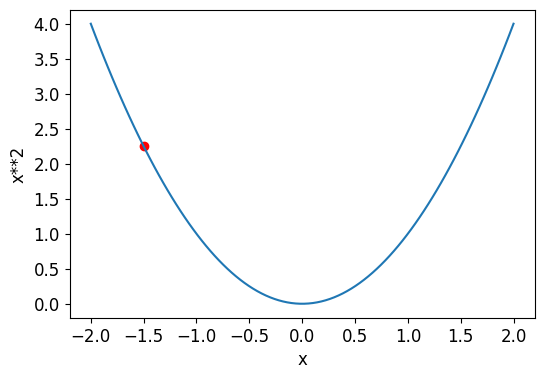

In [5]:
def f(x):
    return x**2

plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(1.5), color = 'red')

In [6]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

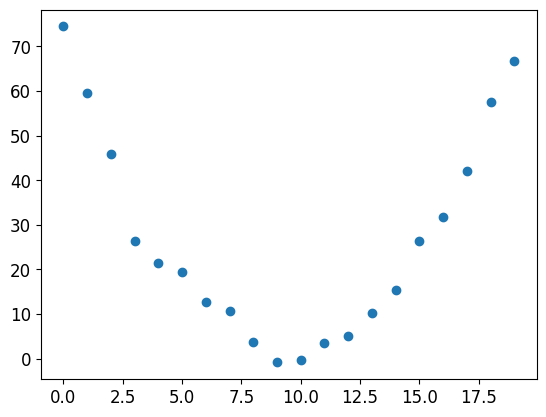

In [7]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [8]:
# function's input - time when we measure the speed
# and parameters - values that define which quadratic we're trying

def f(time, parameters):
    a, b, c = parameters
    return a*(time**2) + (b*time) + c

In [9]:
# define loss function
def mse(prediction, target):
    return ((prediction-target)**2).mean()

In [10]:
# initialize parameters a b c - which need to require gradient descent
params = torch.randn(3).requires_grad_()
original_params = params.clone()

In [11]:
# predict based on current time and parameters
# time was currently initialized a range of numbers between 0 to 20
prediction = f(time, params)

In [12]:
# show predictions based on current parameters in a graph
def show_prediction(prediction, ax = None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed) # current speed and time variance
    ax.scatter(time, to_np(prediction), color = 'red') # predicted speed and time variance
    ax.set_ylim(-200, 200)

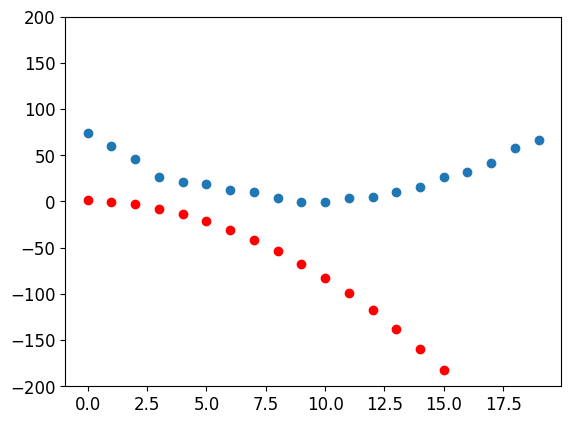

In [13]:
show_prediction(prediction)

In [14]:
loss = mse(prediction, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

In [15]:
loss.backward()

In [16]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [17]:
learning_rate = 1e-5
params.grad * learning_rate

tensor([-0.5320, -0.0342, -0.0025])

In [18]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [19]:
params.data = params.data - (learning_rate * params.grad.data)
params.grad = None

In [20]:
prediction = f(time, params)
mse(prediction, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

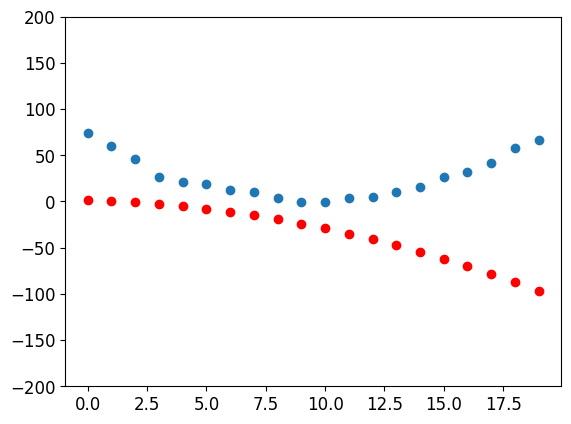

In [21]:
show_prediction(prediction)

In [22]:
def apply_step(parameters, prn = True):
    prediction = f(time, parameters)
    loss = mse(prediction, speed)
    loss.backward()
    params.data -= learning_rate * params.grad.data
    params.grad = None
    if prn:
        print(loss.item())
    return prediction

In [23]:
for i in range(10):
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [24]:
params = original_params.detach().requires_grad_()

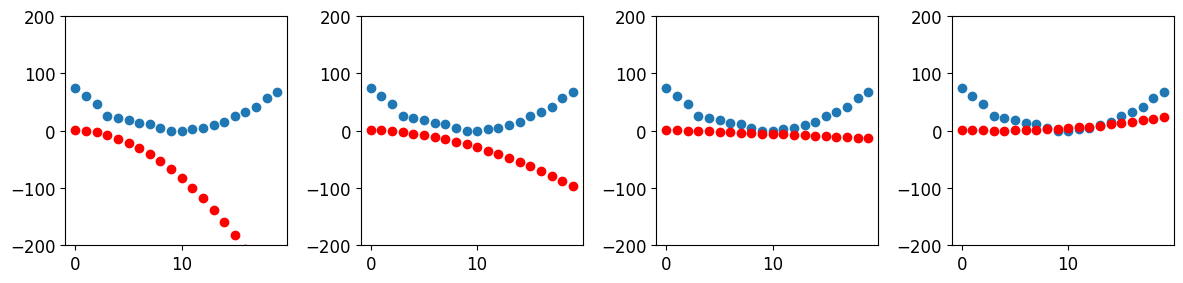

In [25]:
_, axs = plt.subplots(1, 4, figsize = (12, 3))
for ax in axs:
    show_prediction(apply_step(params, False), ax)
plt.tight_layout()

In [65]:
# plt.subplots??